In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Historical Product Demand.csv",parse_dates=['Date'])
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [3]:
df.isnull().sum() #missing values cannot be included or replaced so it should be removed

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [5]:
df.sort_values('Date', ignore_index=True, inplace=True)
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,Whse_A,Category_006,2011-01-08,2
1,Product_1724,Whse_A,Category_003,2011-05-31,108
2,Product_1521,Whse_S,Category_019,2011-06-24,85000
3,Product_1521,Whse_S,Category_019,2011-06-24,7000
4,Product_1507,Whse_C,Category_019,2011-09-02,1250


In [6]:
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,Whse_A,Category_006,2011-01-08,2
1,Product_1724,Whse_A,Category_003,2011-05-31,108
2,Product_1521,Whse_S,Category_019,2011-06-24,85000
3,Product_1521,Whse_S,Category_019,2011-06-24,7000
4,Product_1507,Whse_C,Category_019,2011-09-02,1250


In [7]:
df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)

In [8]:
df[["Product_Code", "Warehouse", "Product_Category"]].describe()

,Product_Code,Warehouse,Product_Category
count,1036643,1036643,1036643
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16935,764215,470090


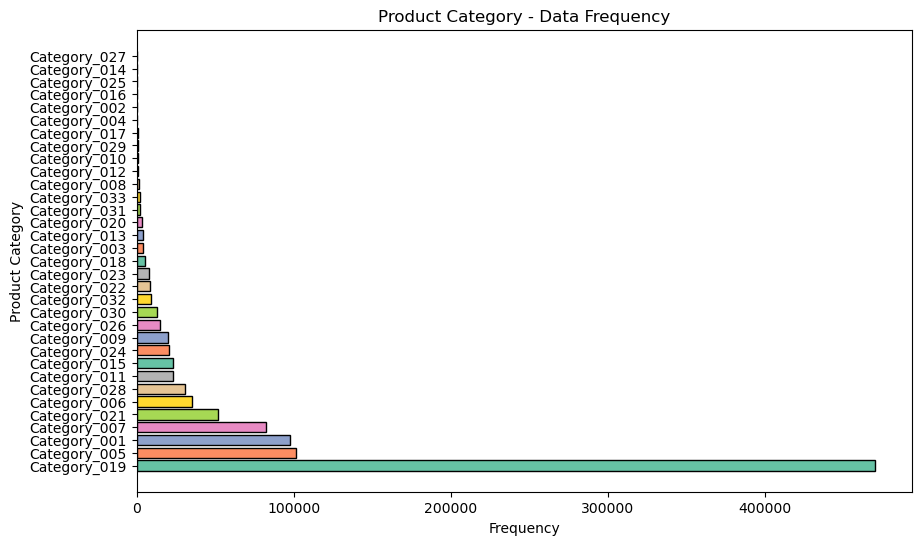

Number of Product Category
Category_019    470090
Category_005    101582
Category_001     97707
Category_007     82348
Category_021     51950
Category_006     35495
Category_028     30957
Category_011     23199
Category_015     22937
Category_024     20863
Category_009     19720
Category_026     14763
Category_030     12978
Category_032      9288
Category_022      8642
Category_023      7885
Category_018      5237
Category_003      4187
Category_013      3740
Category_020      3465
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1146
Category_010       976
Category_029       671
Category_017       615
Category_004       324
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))  
plt.barh(df["Product_Category"].value_counts().index,
         df["Product_Category"].value_counts(), 
         color=colors, edgecolor='black')  

plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.title("Product Category - Data Frequency")

plt.show()

print(f"Number of Product Category\n{df['Product_Category'].value_counts()}")


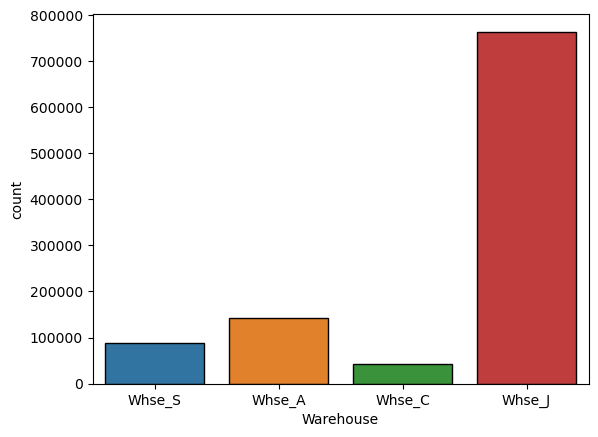

Number of samples according to Warehouse 
Whse_J    764215
Whse_A    142197
Whse_S     88024
Whse_C     42207
Name: Warehouse, dtype: int64


In [10]:
sns.countplot(x="Warehouse", data=df,edgecolor='black')
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples according to Warehouse \n{df['Warehouse'].value_counts()}")

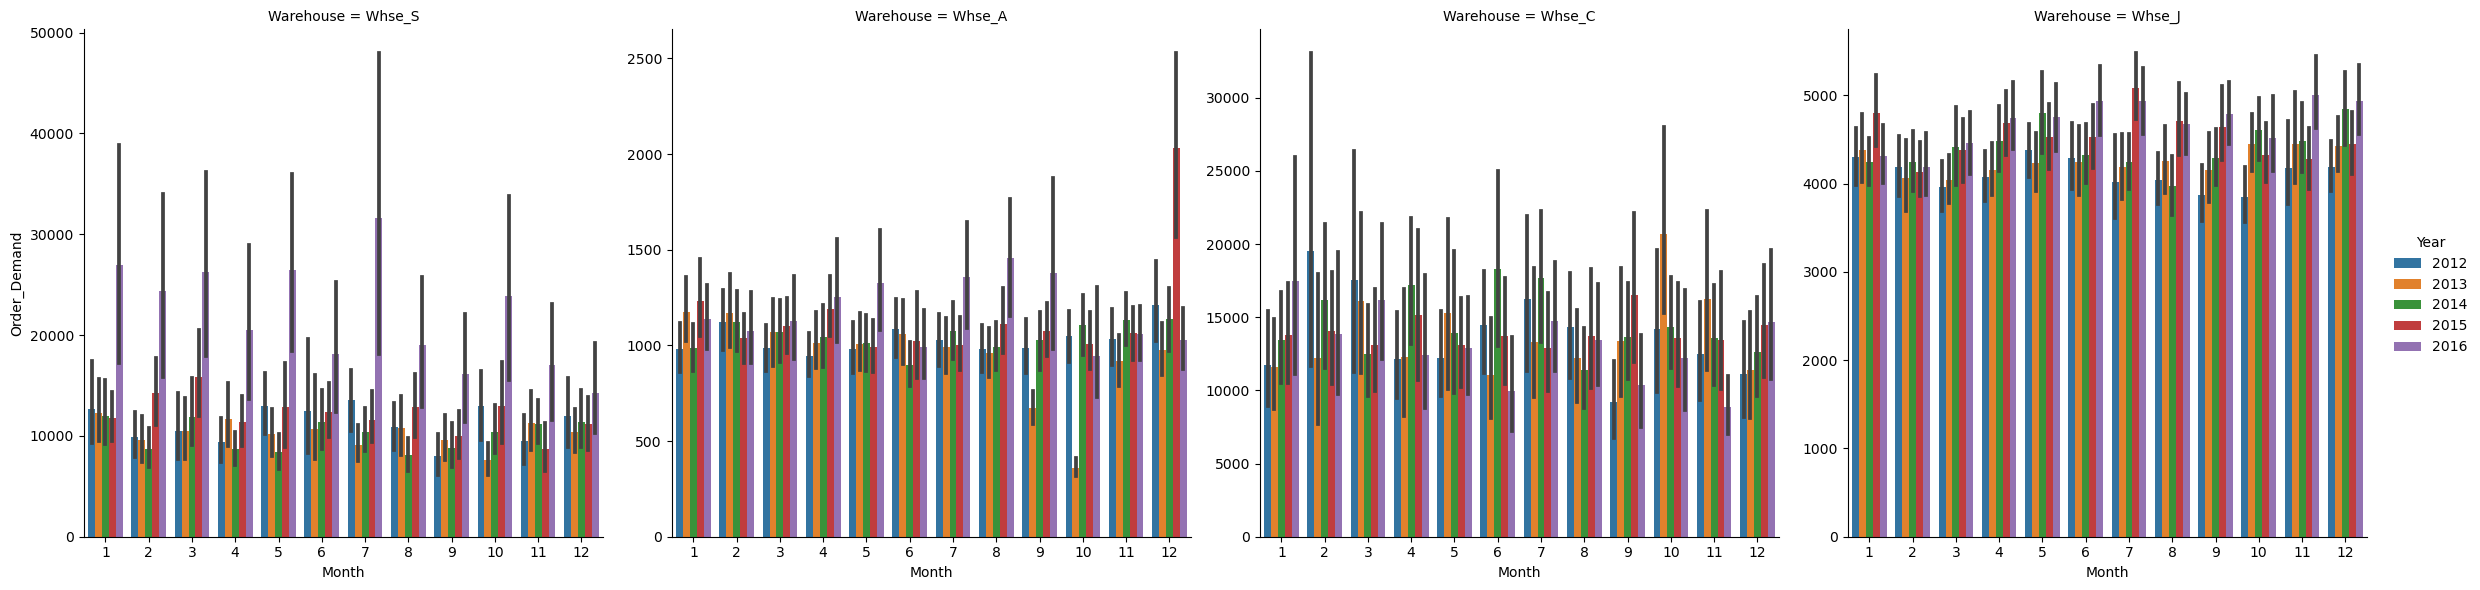

In [11]:
from datetime import datetime as dt
data=df.copy()
data['Year'] = data["Date"].dt.year
data['Month'] = data["Date"].dt.month
data['Day'] = data["Date"].dt.day
sns.catplot(x="Month", y="Order_Demand",  hue="Year", col="Warehouse",
            data=data, kind="bar", height=6,sharey=False)
plt.show()

In [12]:
df_1 = df.groupby('Date')['Order_Demand'].sum().reset_index()
df_1 = df_1.set_index('Date')

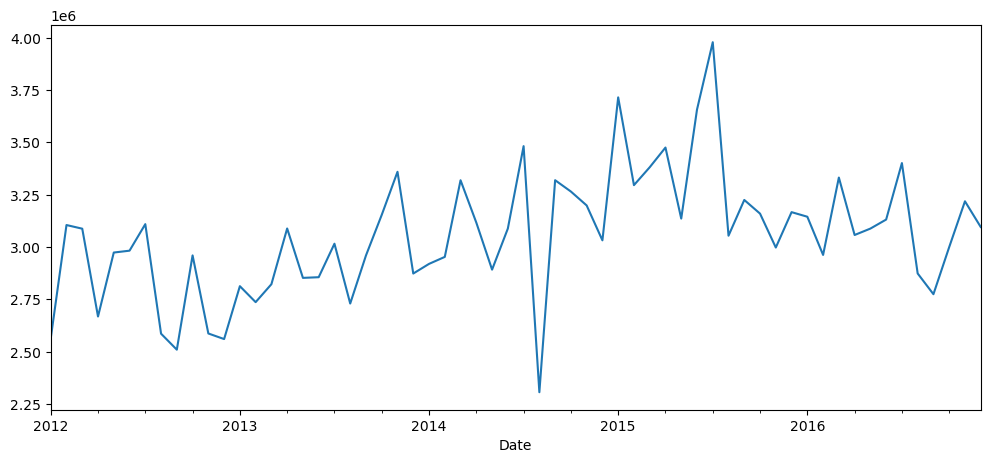

In [13]:
df_1 = df_1['Order_Demand'].resample('MS').mean()
df_1.plot(figsize=(12,5))
plt.show()

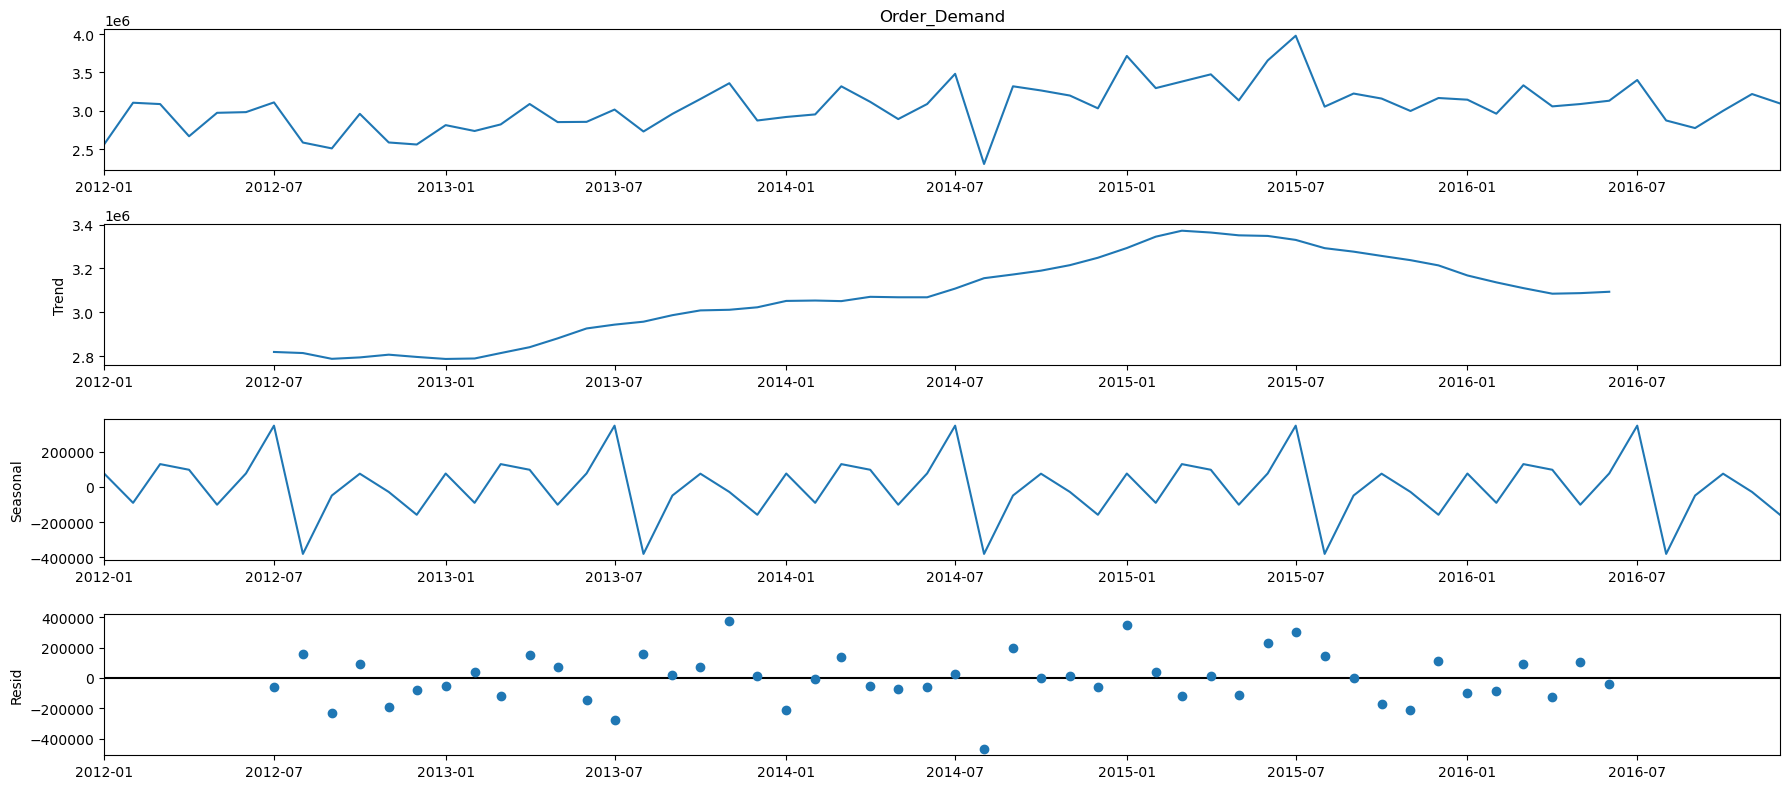

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_1, model='additive')
fig = decomposition.plot()
plt.show()

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1932.23655778549
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1512.9275832124356
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1338.8201294951011
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3167.058797744712
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1366.5117513512635
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1340.8450308457736
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1023.6756022859483
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3055.8804565360188
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1862.0874878045222
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1471.183803270064
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1305.3289813345486
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3086.2832323850976
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1529.100572165079
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1467.6395590277855
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1020.6347629759123
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3000.2801330114016
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1648.7378898187837
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AI

In [44]:
mod = sm.tsa.statespace.SARIMAX(df_1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2450      0.368     -0.666      0.505      -0.966       0.476
ma.L1         -0.4385      0.325     -1.348      0.178      -1.076       0.199
ar.S.L12      -0.4568      0.208     -2.192      0.028      -0.865      -0.048
sigma2      1.018e+11   9.55e-13   1.06e+23      0.000    1.02e+11    1.02e+11


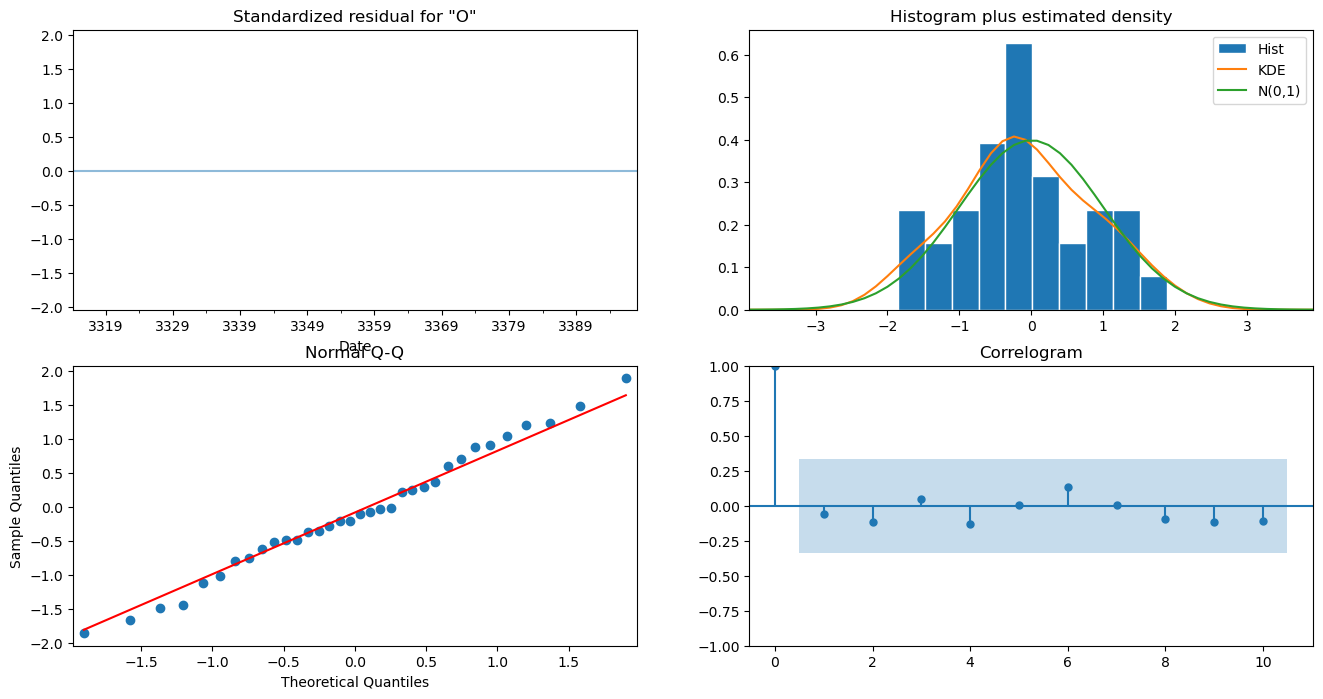

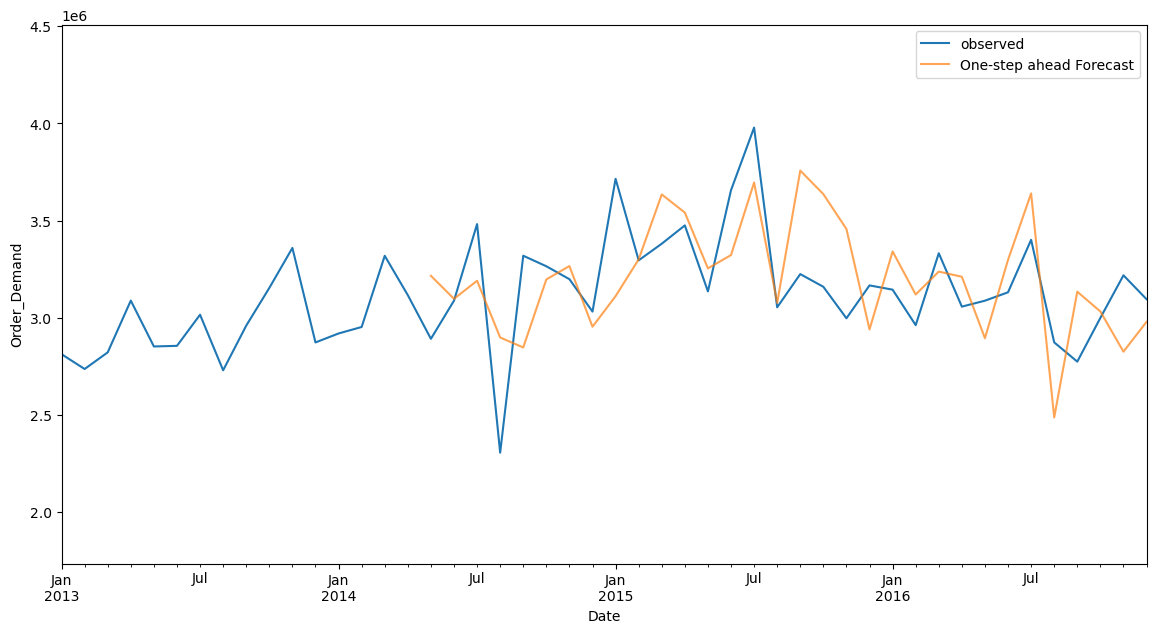

In [51]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = df_1['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue',alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()


In [53]:
y_forecasted = pred.predicted_mean
y_truth = df_1['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 55459437824.94


In [54]:
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

RMSE: 235498.28


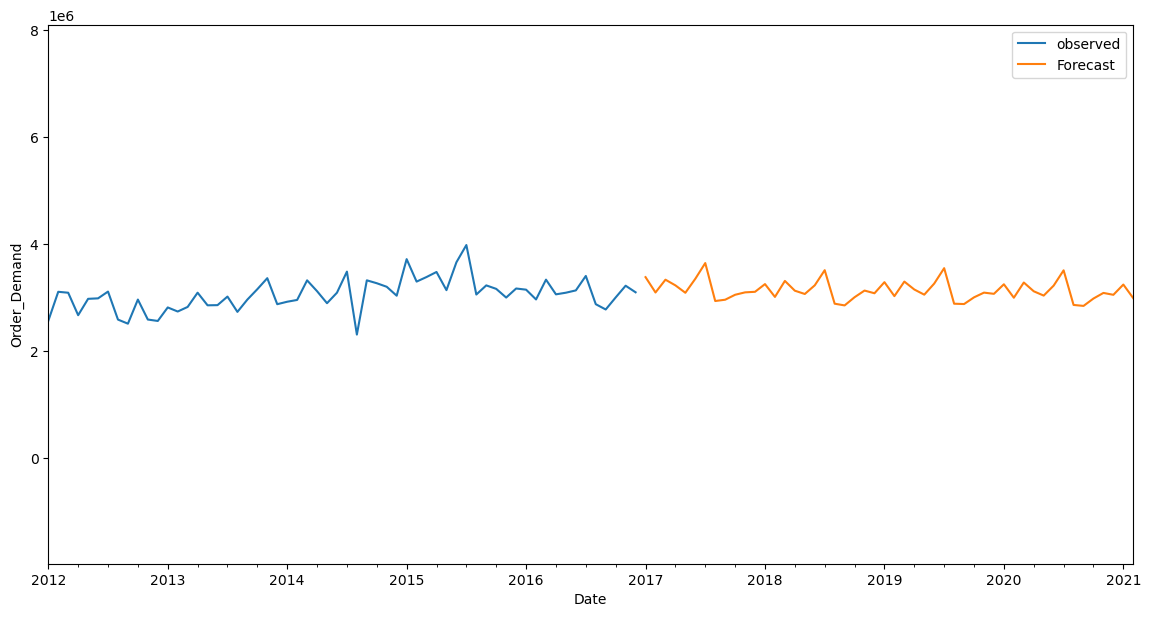

In [55]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df_1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()
